In [18]:
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
import numpy as np
import pandas as pd

In [19]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [20]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float16') / 255
print(train_images.shape)

(60000, 28, 28, 1)


In [21]:
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float16') / 255
print(test_images.shape)

(10000, 28, 28, 1)


In [22]:
print(train_labels[:5])
train_labels = to_categorical(train_labels)

test_labels = to_categorical(test_labels)
print(train_labels[:5, ])

[5 0 4 1 9]
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [23]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

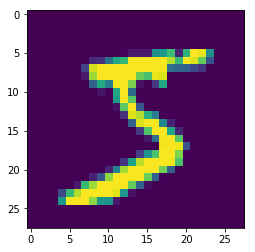

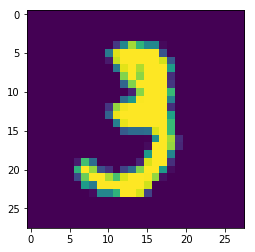

In [24]:
# https://stackoverflow.com/a/45565062
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt

# Get a batch of two random images and show in a pop-up window.
gen_image(train_images[0]).show()
gen_image(train_images[10]).show()

In [25]:
# https://www.quora.com/In-Keras-what-is-a-dense-and-a-dropout-layer/answer/Apurv-Verma?srid=zWoZ
# http://cs231n.github.io/convolutional-networks/
# http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

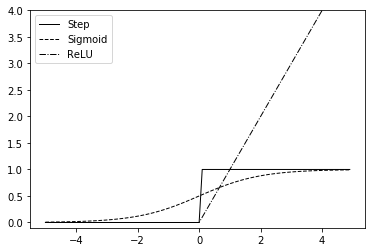

In [59]:
# https://schwalbe10.github.io/thinkage/2017/02/12/activation.html

import numpy as np
import matplotlib.pylab as plt


def step(x):
    return np.array(x > 0, dtype=np.int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y_step = step(x)
y_sigmoid = sigmoid(x)
y_relu = relu(x)

plt.plot(x, y_step, label='Step', color='k', lw=1, linestyle=None)
plt.plot(x, y_sigmoid, label='Sigmoid', color='k', lw=1, ls='--')
plt.plot(x, y_relu, label='ReLU', color='k', lw=1, linestyle='-.')
plt.ylim(-0.1, 4)
plt.legend()
plt.show()

In [26]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
import keras

callbacks = [
    keras.callbacks.TensorBoard(
        # Log files will be written at this location
        log_dir='work',
        #histogram_freq=1,
        # We will record activation histograms every 1 epoch

    )
]
history = model.fit(train_images, train_labels,
                    epochs=3,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 86s 2ms/step - loss: 0.3085 - acc: 0.9020 - val_loss: 0.0766 - val_acc: 0.9773
Epoch 2/3
48000/48000 [==============================] - 87s 2ms/step - loss: 0.0755 - acc: 0.9771 - val_loss: 0.0643 - val_acc: 0.9822
Epoch 3/3
48000/48000 [==============================] - 88s 2ms/step - loss: 0.0512 - acc: 0.9842 - val_loss: 0.0804 - val_acc: 0.9771


In [40]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 6s 580us/step


In [54]:
print(test_acc)

0.9784


In [53]:
(_, _), (_, test_labels_use) = mnist.load_data()
for l, idx in enumerate(test_labels_use):
    match = model.predict_classes(test_images[1].reshape(1, 28, 28, 1))[0] == test_labels_use[1]
    if not match:
        print("Not correct")
        break

1/1 [==============================] - 0s 4ms/step


1/1 [==============================] - 0s 3ms/step


1/1 [==============================] - 0s 3ms/step


1/1 [==============================] - 0s 3ms/step


1/1 [==============================] - 0s 2ms/step


1/1 [==============================] - 0s 3ms/step


1/1 [==============================] - 0s 3ms/step


1/1 [==============================] - 0s 2ms/step


1/1 [==============================] - 0s 3ms/step


1/1 [==============================] - 0s 2ms/step


1/1 [==============================] - 0s 3ms/step


1/1 [==============================] - 0s 2ms/step


1/1 [==============================] - 0s 2ms/step


1/1 [==============================] - 0s 3ms/step


1/1 [==============================] - 0s 3ms/step


1/1 [==============================] - 0s 3ms/step


1/1 [==============================] - 0s 4ms/step


1/1 [==============================] - 0s 3ms/step


1/1 [==============================] - 0s 3ms/step


1/1 [==============================] - 0s 3ms/step


1/1 [==============================] - 0s 3ms/step


1/1 [==============================] - 0s 2ms/step


KeyboardInterrupt: 

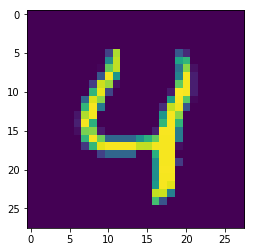

In [55]:
gen_image(test_images[idx]).show()

In [56]:
model.predict_classes(test_images[1].reshape(1, 28, 28, 1))[0]

1/1 [==============================] - 0s 2ms/step


2